In [1]:
using ModelingToolkit, DomainSets, Sophon, CairoMakie, Lux
using Optimization, OptimizationOptimJL

@parameters x, t
@variables θ₁(..), θ₂(..), w₁(..), w₂(..), f₁(..)
Dₜ = Differential(t)
Dₜ² = Differential(t)^2
Dₓ = Differential(x)
Dₓ² = Differential(x)^2

#f₁(x,t) = cos(t)*(1-sin(x))
f₂(x,t) = 2/π * cos(t) - π/2 * sin(x) * cos(t)

eqs = [
    Dₓ(θ₁(x,t)) - Dₓ²(w₁(x,t)) + Dₜ²(w₁(x,t)) + w₁(x,t) - w₂(x,t) ~ f₁(x,t),
    Dₓ(θ₂(x,t)) - Dₓ²(w₂(x,t)) + Dₜ²(w₂(x,t)) + w₂(x,t) - w₁(x,t) ~ f₂(x,t),
    Dₜ²(θ₁(x,t)) ~ Dₓ²(θ₁(x,t)) + Dₓ(w₁(x,t)) - θ₁(x,t),
    Dₜ²(θ₂(x,t)) ~ Dₓ²(θ₂(x,t)) + Dₓ(w₂(x,t)) - θ₂(x,t),
]

bcs = [
    θ₁(x, 0.0) ~ π/2*cos(x) + x - π/2,
    Dₜ(θ₁(x, 0.0)) ~ 0.0,
    w₁(x, 0.0) ~ π/2*sin(x),
    Dₜ(w₁(x, 0.0)) ~ 0.0,
    θ₂(x, 0.0) ~ cos(x) + 2/π * x - 1,
    Dₜ(θ₂(x, 0.0)) ~ 0.0,
    w₂(x, 0.0) ~ sin(x),
    Dₜ(w₂(x, 0.0)) ~ 0.0,
    θ₁(0.0, t) ~ 0.0,
    θ₁(π, t) ~ 0.0,
    w₁(0.0, t) ~ 0.0,
    w₁(π, t) ~ 0.0,
    θ₂(0.0, t) ~ 0.0,
    θ₂(π, t) ~ 0.0,
    w₂(0.0, t) ~ 0.0,
    w₂(π, t) ~ 0.0]

    
domains = [x ∈ Interval(0.0, π),
           t ∈ Interval(0.0, 1.0)]

@named timo_double = PDESystem(eqs, bcs, domains, [x,t], [θ₁,θ₂,w₁,w₂,f₁])

PDESystem
Equations: Equation[Differential(t)(Differential(t)(w₁(x, t))) + Differential(x)(θ₁(x, t)) + w₁(x, t) - Differential(x)(Differential(x)(w₁(x, t))) - w₂(x, t) ~ f₁(x, t), Differential(t)(Differential(t)(w₂(x, t))) + Differential(x)(θ₂(x, t)) + w₂(x, t) - Differential(x)(Differential(x)(w₂(x, t))) - w₁(x, t) ~ 0.6366197723675814cos(t) - 1.5707963267948966cos(t)*sin(x), Differential(t)(Differential(t)(θ₁(x, t))) ~ Differential(x)(Differential(x)(θ₁(x, t))) + Differential(x)(w₁(x, t)) - θ₁(x, t), Differential(t)(Differential(t)(θ₂(x, t))) ~ Differential(x)(Differential(x)(θ₂(x, t))) + Differential(x)(w₂(x, t)) - θ₂(x, t)]
Boundary Conditions: Equation[θ₁(x, 0.0) ~ x + 1.5707963267948966cos(x) - 1.5707963267948966, Differential(t)(θ₁(x, 0.0)) ~ 0.0, w₁(x, 0.0) ~ 1.5707963267948966sin(x), Differential(t)(w₁(x, 0.0)) ~ 0.0, θ₂(x, 0.0) ~ 0.6366197723675814x + cos(x) - 1, Differential(t)(θ₂(x, 0.0)) ~ 0.0, w₂(x, 0.0) ~ sin(x), Differential(t)(w₂(x, 0.0)) ~ 0.0, θ₁(0.0, t) ~ 0.0, θ₁(π,

In [5]:
pinn = PINN(θ₁ = Siren(2,1; hidden_dims=16,num_layers=4,omega=1),
            θ₂ = Siren(2,1; hidden_dims=16,num_layers=4,omega=1),
            w₁ = Siren(2,1; hidden_dims=16,num_layers=4,omega=1),
            w₂ = Siren(2,1; hidden_dims=16,num_layers=4,omega=1),
            f₁ = Siren(2,1; hidden_dims=16,num_layers=4,omega=1))

sampler = QuasiRandomSampler(2000, 500)
strategy = NonAdaptiveTraining(1, 10)

prob = Sophon.discretize(timo_double, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(θ₁ = (layer_1 = (weight = [-0.4248920679092407 0.2112939953804016; 0.038879573345184326 -0.3354121446609497; … ; 0.23755663633346558 0.09088766574859619; -0.41732680797576904 -0.080363929271698], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [-0.27785778045654297 0.5419869422912598 … -0.38474223017692566 0.23502840101718903; 0.5146108865737915 -0.015155848115682602 … 0.04985794052481651 -0.2128366231918335; … ; -0.6067971587181091 0.6011557579040527 … 0.5465533137321472 -0.29129964113235474; -0.5670574307441711 0.18655475974082947 … 0.5713525414466858 -0.5755535960197449], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [0.23432649672031403 -0.08304169774055481 … -0.37212321162223816 0.47990119457244873; -0.3058951497077942 0.14873197674751282 … -0.5073658227920532 -0.009205433540046215; … ; -0.5820487141609192 0.35872215032577515 … 0.5042369365692139 -0.12203928083181381; 0.11669338494539261 -0.39969587

In [2]:
f₁_(x,t) = cos(t)*(1-sin(x)) + rand() * 0.001

x_train = [0.2,0.8,1.8,2.6,3.0]
t_train = 0.0:0.001:1.0

coord_data = stack(vec(vcat.(x_train, t_train')))
f₁_data = reshape(f₁_.(x_train, t_train'), 1, :)

1×5005 Matrix{Float64}:
 0.801971  0.28279  0.0269108  0.485254  …  0.0149741  0.261832  0.464109

In [3]:
function additional_loss(phi, ps)
    (sum(abs2, phi.f₁(coord_data, ps.f₁) .- f₁_data))/50000
end

additional_loss (generic function with 1 method)

In [7]:
prob = Sophon.discretize(timo_double, pinn, sampler, strategy; additional_loss=additional_loss)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(θ₁ = (layer_1 = (weight = [-0.4248920679092407 0.2112939953804016; 0.038879573345184326 -0.3354121446609497; … ; 0.23755663633346558 0.09088766574859619; -0.41732680797576904 -0.080363929271698], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [-0.27785778045654297 0.5419869422912598 … -0.38474223017692566 0.23502840101718903; 0.5146108865737915 -0.015155848115682602 … 0.04985794052481651 -0.2128366231918335; … ; -0.6067971587181091 0.6011557579040527 … 0.5465533137321472 -0.29129964113235474; -0.5670574307441711 0.18655475974082947 … 0.5713525414466858 -0.5755535960197449], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [0.23432649672031403 -0.08304169774055481 … -0.37212321162223816 0.47990119457244873; -0.3058951497077942 0.14873197674751282 … -0.5073658227920532 -0.009205433540046215; … ; -0.5820487141609192 0.35872215032577515 … 0.5042369365692139 -0.12203928083181381; 0.11669338494539261 -0.39969587

In [8]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=2000, callback=callback)

Loss: 171.91347590088364


Loss: 44.28945689418053


Loss: 20.897099417318845


Loss: 13.794068940125802


Loss: 11.272798897194232


Loss: 9.554164347962407


Loss: 7.891033961892612


Loss: 6.1684704410808


Loss: 5.139556859187363


Loss: 4.8085199848955185


Loss: 4.639054428501791


Loss: 3.795927749175805


Loss: 3.1591149645777032


Loss: 2.3318494155798946


Loss: 1.785645420929923


Loss: 1.6780937369963875


Loss: 1.4615224391524195


Loss: 1.298480292240636


Loss: 1.0949150541470904


Loss: 0.9890232980172292


Loss: 0.8946934531576909


Loss: 0.7892530772661135


Loss: 0.7523660615764034


Loss: 0.6706042323357647


Loss: 0.6114977811232216


Loss: 0.5386812560505971


Loss: 0.4696603146116463


Loss: 0.42892789600177167


Loss: 0.3851431559554119


Loss: 0.32389983595150174


Loss: 0.2826426898078393


Loss: 0.2612097735792585


Loss: 0.24503338077361936


Loss: 0.22732205231645594


Loss: 0.21384030712365176


Loss: 0.20275015090165377


Loss: 0.19724030043058674


Loss: 0.1831097710665817


Loss: 0.17096083416585425


Loss: 0.14541595087184955


Loss: 0.1366110197432264


Loss: 0.12736814819886555


Loss: 0.11856664571941548


Loss: 0.11371697901224435


Loss: 0.10274859339068873


Loss: 0.09977080726297116


Loss: 0.09546054839074375


Loss: 0.09119838783672402


Loss: 0.07575864328139584


Loss: 0.072381857954212


Loss: 0.0708501126087051


Loss: 0.06918526938896173


Loss: 0.061404473248202904


Loss: 0.05866636803618658


Loss: 0.0561554409544017


Loss: 0.049499710197412845


Loss: 0.04421710816093729


Loss: 0.04205426951525573


Loss: 0.039312179990535365


Loss: 0.03746063598953815


Loss: 0.03608515131450411


Loss: 0.031191172405509844


Loss: 0.03006935617363106


Loss: 0.028566269303132864


Loss: 0.0269108607243217


Loss: 0.025285709774676958


Loss: 0.023289916290035087


Loss: 0.02157865519303937


Loss: 0.020933740139288916


Loss: 0.019757719290232005


Loss: 0.018478342744717026


Loss: 0.017211817079108897


Loss: 0.016354237683997613


Loss: 0.015213955561904975


Loss: 0.014638046998545005


Loss: 0.013839580971526716


Loss: 0.013186781013750482


Loss: 0.012527261162349155


Loss: 0.012117609062557131


Loss: 0.011403622171733166


Loss: 0.010850379908805012


Loss: 0.0104403224361544


Loss: 0.010027384482086447


Loss: 0.009424454567646982


Loss: 0.008972895123674067


Loss: 0.008555500114469303


Loss: 0.008172208371859193


Loss: 0.00764989404132531


Loss: 0.007249642850936858


Loss: 0.006936928430939315


Loss: 0.006665601793937113


Loss: 0.006472111696047367


Loss: 0.006237223097381542


Loss: 0.005907121147207738


Loss: 0.0056889746751467175


Loss: 0.005456369603786658


Loss: 0.005228289854623221


Loss: 0.005007042391410898


Loss: 0.004649078079394107


Loss: 0.004492218570532712


Loss: 0.004343269883893276


Loss: 0.0040630936143449415


Loss: 0.0038504745704098296


Loss: 0.0036932657342522287


Loss: 0.0034815790797846575


Loss: 0.003317894893717093


Loss: 0.0031281230175718494


Loss: 0.002937661680017091


Loss: 0.002831071277008146


Loss: 0.002730073478407586


Loss: 0.00260624006761413


Loss: 0.002514163668277106


Loss: 0.0024486845271086194


Loss: 0.002359604319724423


Loss: 0.002296475600999797


Loss: 0.002205183456613241


Loss: 0.0020990640837297097


Loss: 0.0019632325221000395


Loss: 0.0018516318739382892


Loss: 0.0017720903747795963


Loss: 0.001717123926946458


Loss: 0.001645976320725184


Loss: 0.0015970532519608326


Loss: 0.0015460881225550656


Loss: 0.0015128013089228674


Loss: 0.0014781250141196421


Loss: 0.001442198040979465


Loss: 0.0014109662359224145


Loss: 0.0013839480315261843


Loss: 0.0013417954401642172


Loss: 0.001307120130182926


Loss: 0.0012757563478185735


Loss: 0.001229384867452735


Loss: 0.0011933644370954934


Loss: 0.0011643605881582286


Loss: 0.0011344858064816306


Loss: 0.0011068107426302673


Loss: 0.0010716360441186338


Loss: 0.0010259344225921933


Loss: 0.0009864680752450466


Loss: 0.0009592702708520693


Loss: 0.0009401321117329643


Loss: 0.0009207962453340677


Loss: 0.0008931177376896786


Loss: 0.0008659287804332167


Loss: 0.0008421801753214768


Loss: 0.0008150028076602696


Loss: 0.0007921097577544624


Loss: 0.000766701292518504


Loss: 0.0007372583517079522


Loss: 0.0007106632230425436


Loss: 0.0006829827706884583


Loss: 0.0006591792948640325


Loss: 0.0006433798468767772


Loss: 0.0006315052404900125


Loss: 0.0006203818632023075


Loss: 0.0006136859839634155


Loss: 0.0006046011344461588


Loss: 0.0005927703166258122


Loss: 0.000582708725239068


Loss: 0.0005756374430542499


Loss: 0.0005649759742448586


Loss: 0.0005560688502475365


Loss: 0.0005429790619332171


Loss: 0.0005329845954884356


Loss: 0.0005254244272418903


Loss: 0.0005200515557468085


Loss: 0.0005149069643657515


Loss: 0.0005096742845463939


Loss: 0.0005045656434490803


Loss: 0.0004981700122842826


Loss: 0.0004896982574282851


Loss: 0.00047952591430260993


Loss: 0.00047299251408625484


Loss: 0.0004661040782374631


Loss: 0.0004571684717872908


Loss: 0.00045037143804647667


Loss: 0.00044544578658279384


Loss: 0.0004401581059133879


Loss: 0.00043228260862625007


Loss: 0.00042696936168289725


Loss: 0.0004207512516735039


Loss: 0.0004164087108959655


Loss: 0.0004104923711095283


Loss: 0.00040495106700277883


Loss: 0.00039983633398568485


Loss: 0.000393631361836162


Loss: 0.00038397594451431035


Loss: 0.00037473841468733894


Loss: 0.00036363730549172506


Loss: 0.0003575374057012609


Loss: 0.0003501872998640543


Loss: 0.0003429574206790176


Loss: 0.00033503635478362634


Loss: 0.0003281696114762161


Loss: 0.0003200754148506637


Loss: 0.000311009052795552


Loss: 0.0003029677244033084


Loss: 0.00029358894198901675


Loss: 0.0002870799275788234


Loss: 0.0002791159264550564


Loss: 0.0002742879036431484


Loss: 0.0002698132278596578


Loss: 0.00026541371377539067


Loss: 0.00026037971291146807


Loss: 0.0002546276323573279


Loss: 0.000248797073787369


Loss: 0.00024088961911263452


Loss: 0.00023693967091421928


Loss: 0.00023235459725047146


Loss: 0.00022937729202717738


Loss: 0.00022638472864754784


Loss: 0.00022363566351401554


Loss: 0.0002213403513309436


Loss: 0.0002187268579250895


Loss: 0.00021504371762773056


Loss: 0.0002113289027971659


Loss: 0.00020694655060392861


Loss: 0.00020261082543924851


Loss: 0.00019947974662428854


Loss: 0.0001953807597999476


Loss: 0.00019226130830841465


Loss: 0.00018904588678038216


Loss: 0.00018491869674035327


Loss: 0.0001818089395536308


Loss: 0.0001774528534937311


Loss: 0.0001736049934823114


Loss: 0.00016975524194671278


Loss: 0.0001670227408228536


Loss: 0.00016441134906147094


Loss: 0.0001623685799391391


Loss: 0.00016038818238893894


Loss: 0.00015867178966688121


Loss: 0.0001570888761035089


Loss: 0.00015550194742713127


Loss: 0.00015349576080123282


Loss: 0.00015141209732263023


Loss: 0.00014924556625483789


Loss: 0.0001475270317082929


Loss: 0.00014595996020044864


Loss: 0.00014500395164058181


Loss: 0.00014344177466241458


Loss: 0.0001418800276067166


Loss: 0.00013949822022325738


Loss: 0.0001370980177182409


Loss: 0.00013468399260946074


Loss: 0.0001313045673620568


Loss: 0.00012841511770787968


Loss: 0.00012508522023488893


Loss: 0.00012298461339411277


Loss: 0.00012105934538644196


Loss: 0.00011857377750137855


Loss: 0.00011569641024616282


Loss: 0.00011343873482231456


Loss: 0.00010977941014532832


Loss: 0.00010742782740494603


Loss: 0.00010518334552448252


Loss: 0.0001035358901165925


Loss: 0.00010173619483105776


Loss: 9.971297341188343e-5


Loss: 9.779354221377447e-5


Loss: 9.587166728697561e-5


Loss: 9.438855049980368e-5


Loss: 9.304064334032382e-5


Loss: 9.17231308067288e-5


Loss: 9.051617261786007e-5


Loss: 8.967541716123595e-5


Loss: 8.857465340409465e-5


Loss: 8.737857145412813e-5


Loss: 8.616399827905329e-5


Loss: 8.515682028952142e-5


Loss: 8.385707439612336e-5


Loss: 8.247663018575566e-5


Loss: 8.113834870922581e-5


Loss: 7.995018652027998e-5


Loss: 7.879902080811809e-5


Loss: 7.775709970018376e-5


Loss: 7.678714276391517e-5


Loss: 7.551533367503743e-5


Loss: 7.44666051626565e-5


Loss: 7.326314365358373e-5


Loss: 7.181233419525804e-5


Loss: 7.03365750226715e-5


Loss: 6.876123674261706e-5


Loss: 6.723788843521992e-5


Loss: 6.633515134112325e-5


Loss: 6.55211865417945e-5


Loss: 6.454485597847e-5


Loss: 6.359240238466146e-5


Loss: 6.251248462073323e-5


Loss: 6.131056266444358e-5


Loss: 5.998988969757564e-5


Loss: 5.8307277183395786e-5


Loss: 5.7076886749305034e-5


Loss: 5.6302848604997935e-5


Loss: 5.529236123719848e-5


Loss: 5.462276744524106e-5


Loss: 5.3910504983073746e-5


Loss: 5.3009039656980154e-5


Loss: 5.204032616877141e-5


Loss: 5.110584503111047e-5


Loss: 5.031007440780093e-5


Loss: 4.961600534136359e-5


Loss: 4.888828031934264e-5


Loss: 4.826678365872583e-5


Loss: 4.772992929836597e-5


Loss: 4.736065063819793e-5


Loss: 4.6955691160217085e-5


Loss: 4.659783646572309e-5


Loss: 4.6216086916059574e-5


Loss: 4.5587398588200974e-5


Loss: 4.4946774126839596e-5


Loss: 4.440811964269124e-5


Loss: 4.378310698383022e-5


Loss: 4.3224217719066644e-5


Loss: 4.2621562289228366e-5


Loss: 4.2045996620166786e-5


Loss: 4.156664175369828e-5


Loss: 4.097092659501956e-5


Loss: 4.0394264044241366e-5


Loss: 3.995997101762363e-5


Loss: 3.953553732691413e-5


Loss: 3.902223618270666e-5


Loss: 3.856097795912752e-5


Loss: 3.805418194233557e-5


Loss: 3.741001856586554e-5


Loss: 3.680660701958103e-5


Loss: 3.632343631270138e-5


Loss: 3.5916334374765994e-5


Loss: 3.546938259643526e-5


Loss: 3.498046452490484e-5


Loss: 3.455567535027331e-5


Loss: 3.406406392146108e-5


Loss: 3.3746440267122115e-5


Loss: 3.355184038732964e-5


Loss: 3.33706750102202e-5


Loss: 3.3168822829815986e-5


Loss: 3.2900001950961873e-5


Loss: 3.259457372086161e-5


Loss: 3.221773743168706e-5


Loss: 3.179249578979943e-5


Loss: 3.13532339586621e-5


Loss: 3.0916216306054204e-5


Loss: 3.055619020848098e-5


Loss: 3.016396092147439e-5


Loss: 2.9758405209135196e-5


Loss: 2.9450999960528488e-5


Loss: 2.9233133840643534e-5


Loss: 2.9056350968137644e-5


Loss: 2.8917774425175725e-5


Loss: 2.8776302924405006e-5


Loss: 2.856397971693358e-5


Loss: 2.8359737477778634e-5


Loss: 2.8091210044817682e-5


Loss: 2.7795356014203056e-5


Loss: 2.7592079819145244e-5


Loss: 2.7445316648755843e-5


Loss: 2.7259313345539624e-5


Loss: 2.7036768001048922e-5


Loss: 2.6757536455041496e-5


Loss: 2.652176124154552e-5


Loss: 2.617447012416329e-5


Loss: 2.5755057224972028e-5


Loss: 2.5446654613175864e-5


Loss: 2.525429465164888e-5


Loss: 2.4980144798588255e-5


Loss: 2.470425468932053e-5


Loss: 2.4437337358870213e-5


Loss: 2.4125419419285933e-5


Loss: 2.386748586173676e-5


Loss: 2.3590733836795142e-5


Loss: 2.3231636025300666e-5


Loss: 2.2990649435792116e-5


Loss: 2.275343015593573e-5


Loss: 2.246574129184339e-5


Loss: 2.2094092812276218e-5


Loss: 2.182402543074923e-5


Loss: 2.1617471433826652e-5


Loss: 2.139616145586452e-5


Loss: 2.1244340232165617e-5


Loss: 2.1077147373546802e-5


Loss: 2.0883999051790684e-5


Loss: 2.0593722629642798e-5


Loss: 2.0220102906909034e-5


Loss: 1.983068531627624e-5


Loss: 1.9338359468338695e-5


Loss: 1.89824523903168e-5


Loss: 1.8780583461698437e-5


Loss: 1.860828553755935e-5


Loss: 1.846372340091424e-5


Loss: 1.8313916294869592e-5


Loss: 1.817608484384143e-5


Loss: 1.8023894987359505e-5


Loss: 1.7846194607080665e-5


Loss: 1.7688360069054614e-5


Loss: 1.757423860854883e-5


Loss: 1.7480328251230293e-5


Loss: 1.7396487955681907e-5


Loss: 1.728694240957355e-5


Loss: 1.7159207640914214e-5


Loss: 1.6965027694309253e-5


Loss: 1.6728254435851114e-5


Loss: 1.6520897883522393e-5


Loss: 1.635340738181952e-5


Loss: 1.6216654197610013e-5


Loss: 1.6117416311032145e-5


Loss: 1.6045491525766587e-5


Loss: 1.598293579511464e-5


Loss: 1.5906873441867715e-5


Loss: 1.5805624898356014e-5


Loss: 1.56864209951676e-5


Loss: 1.559003003946141e-5


Loss: 1.5523406495032103e-5


Loss: 1.545675869995074e-5


Loss: 1.5369150778755487e-5


Loss: 1.5191661866958395e-5


Loss: 1.4868876897875407e-5


Loss: 1.4637679017206681e-5


Loss: 1.4476073945907492e-5


Loss: 1.435603310565709e-5


Loss: 1.4257858432341997e-5


Loss: 1.4129033845907847e-5


Loss: 1.3925902454301597e-5


Loss: 1.3747842721013473e-5


Loss: 1.360135916930538e-5


Loss: 1.3491628826768217e-5


Loss: 1.3424937208994362e-5


Loss: 1.335247488699834e-5


Loss: 1.3289521936753441e-5


Loss: 1.3245074921082272e-5


Loss: 1.3207329406878062e-5


Loss: 1.3151851666034503e-5


Loss: 1.3066099417424275e-5


Loss: 1.2971853896183154e-5


Loss: 1.2911789741891251e-5


Loss: 1.2863650749154374e-5


Loss: 1.2771705487452017e-5


Loss: 1.2595506024116134e-5


Loss: 1.24215850052568e-5


Loss: 1.2262789427622002e-5


Loss: 1.2118737400477214e-5


Loss: 1.2017317857496126e-5


Loss: 1.1932697323307147e-5


Loss: 1.1851297250182365e-5


Loss: 1.1774548810237264e-5


Loss: 1.1719403157418463e-5


Loss: 1.163938290097058e-5


Loss: 1.1504648494731043e-5


Loss: 1.1383620636144881e-5


Loss: 1.122929529499579e-5


Loss: 1.1113904306365217e-5


Loss: 1.1029838977766971e-5


Loss: 1.0962605507114764e-5


Loss: 1.0911757783860778e-5


Loss: 1.085535001698538e-5


Loss: 1.0768580026652406e-5


Loss: 1.0699181610459753e-5


Loss: 1.060762869540795e-5


Loss: 1.0534618594684102e-5


Loss: 1.045836893259822e-5


Loss: 1.0384522039581826e-5


Loss: 1.0305373956211063e-5


Loss: 1.0168295306338636e-5


Loss: 1.0028424222107427e-5


Loss: 9.894158815628473e-6


Loss: 9.790129078345749e-6


Loss: 9.724217066109006e-6


Loss: 9.688444517016997e-6


Loss: 9.647704485193613e-6


Loss: 9.615578368388513e-6


Loss: 9.595503729957803e-6


Loss: 9.571379936873492e-6


Loss: 9.54250596610311e-6


Loss: 9.498881138795482e-6


Loss: 9.44365056007572e-6


Loss: 9.363534397980445e-6


Loss: 9.294213482583094e-6


Loss: 9.236764718429233e-6


Loss: 9.196449334512259e-6


Loss: 9.16424357148473e-6


Loss: 9.139429931876577e-6


Loss: 9.113486989924688e-6


Loss: 9.08422646273284e-6


Loss: 9.043803349015799e-6


Loss: 8.981849606681575e-6


Loss: 8.908196676224208e-6


Loss: 8.833914284890365e-6


Loss: 8.770797741708198e-6


Loss: 8.710081687391248e-6


Loss: 8.660495339163894e-6


Loss: 8.62253765778207e-6


Loss: 8.57529960873149e-6


Loss: 8.52785095178831e-6


Loss: 8.452862611435364e-6


Loss: 8.347518356014807e-6


Loss: 8.277958730114345e-6


Loss: 8.23518683126471e-6


Loss: 8.20522875945935e-6


Loss: 8.179588797232107e-6


Loss: 8.15741892652737e-6


Loss: 8.133176110955925e-6


Loss: 8.118197462597083e-6


Loss: 8.107618232155494e-6


Loss: 8.085915680086051e-6


Loss: 8.056221176666433e-6


Loss: 8.016310720736378e-6


Loss: 7.956432539935736e-6


Loss: 7.887943288928544e-6


Loss: 7.83239918524069e-6


Loss: 7.783287442949972e-6


Loss: 7.751619064596234e-6


Loss: 7.728319717711046e-6


Loss: 7.70332356839394e-6


Loss: 7.672610129938604e-6


Loss: 7.6434511434767e-6


Loss: 7.614509838450518e-6


Loss: 7.587161192043294e-6


Loss: 7.547782718710917e-6


Loss: 7.504006019881825e-6


Loss: 7.459538758099781e-6


Loss: 7.392568358408305e-6


Loss: 7.330822400073522e-6


Loss: 7.284231579012607e-6


Loss: 7.2513679594101385e-6


Loss: 7.220414982737041e-6


Loss: 7.18904709911705e-6


Loss: 7.16234049282868e-6


Loss: 7.142369265693544e-6


Loss: 7.109911084735141e-6


Loss: 7.087742180276038e-6


Loss: 7.061612540429879e-6


Loss: 7.034097572850412e-6


Loss: 7.00201296264582e-6


Loss: 6.9599423339660345e-6


Loss: 6.92368588615829e-6


Loss: 6.885185518601089e-6


Loss: 6.8544074321884375e-6


Loss: 6.8190822016144925e-6


Loss: 6.7808080063994954e-6


Loss: 6.747978905972806e-6


Loss: 6.717277242433248e-6


Loss: 6.6865417788607794e-6


Loss: 6.659448343110759e-6


Loss: 6.643929234118396e-6


Loss: 6.634115069059225e-6


Loss: 6.618967900728755e-6


Loss: 6.600623514777347e-6


Loss: 6.573839817226137e-6


Loss: 6.522504890717655e-6


Loss: 6.4121377153906445e-6


Loss: 6.27129865818626e-6


Loss: 6.191030978298676e-6


Loss: 6.149259480973407e-6


Loss: 6.099640948405381e-6


Loss: 6.075739234185867e-6


Loss: 6.0563855390961775e-6


Loss: 6.040331253819567e-6


Loss: 6.027825438342757e-6


Loss: 6.017246718029096e-6


Loss: 6.004605789242662e-6


Loss: 5.9904102618815e-6


Loss: 5.980522755961511e-6


Loss: 5.968017639745428e-6


Loss: 5.954094442125496e-6


Loss: 5.941756583653811e-6


Loss: 5.929292159288131e-6


Loss: 5.914486680456794e-6


Loss: 5.899020379109803e-6


Loss: 5.8816861078986304e-6


Loss: 5.863264895785953e-6


Loss: 5.848969217513515e-6


Loss: 5.827994131669503e-6


Loss: 5.805810538232707e-6


Loss: 5.784457177780743e-6


Loss: 5.764092876436067e-6


Loss: 5.740426661189591e-6


Loss: 5.7199345208596604e-6


Loss: 5.705165527236348e-6


Loss: 5.692046985327118e-6


Loss: 5.678543106105469e-6


Loss: 5.66735941497685e-6


Loss: 5.659130374593388e-6


Loss: 5.6494248453136435e-6


Loss: 5.627026706659232e-6


Loss: 5.5742058996648e-6


Loss: 5.501908733141059e-6


Loss: 5.434592306662584e-6


Loss: 5.377826376084392e-6


Loss: 5.336106176061684e-6


Loss: 5.310153325677584e-6


Loss: 5.288008190625024e-6


Loss: 5.270888214592581e-6


Loss: 5.255644097174667e-6


Loss: 5.242796884596679e-6


Loss: 5.23325485429953e-6


Loss: 5.223596665758007e-6


Loss: 5.215012239977521e-6


Loss: 5.2024485558098774e-6


Loss: 5.187239862215242e-6


Loss: 5.164843750697087e-6


Loss: 5.136797982923829e-6


Loss: 5.11672537034032e-6


Loss: 5.081985246495177e-6


Loss: 5.052671044678256e-6


Loss: 5.027511417305359e-6


Loss: 5.008146162407705e-6


Loss: 4.9910047802827575e-6


Loss: 4.9767916138629185e-6


Loss: 4.961752662499896e-6


Loss: 4.943509279486926e-6


Loss: 4.929847653513518e-6


Loss: 4.917691043255837e-6


Loss: 4.90352290647902e-6


Loss: 4.889660979514794e-6


Loss: 4.872079049788039e-6


Loss: 4.856198534334348e-6


Loss: 4.838340173696053e-6


Loss: 4.817552079815857e-6


Loss: 4.795229604375051e-6


Loss: 4.7696313118370615e-6


Loss: 4.731444548010596e-6


Loss: 4.6910786373122445e-6


Loss: 4.654870333557077e-6


Loss: 4.634180783805496e-6


Loss: 4.618793277658515e-6


Loss: 4.603363509725743e-6


Loss: 4.582196924384145e-6


Loss: 4.552513566795217e-6


Loss: 4.514079255847672e-6


Loss: 4.4769403399187014e-6


Loss: 4.446140485082095e-6


Loss: 4.414922507643646e-6


Loss: 4.377488008653145e-6


Loss: 4.344342794933809e-6


Loss: 4.320187882172653e-6


Loss: 4.2988171525022065e-6


Loss: 4.285487404497988e-6


Loss: 4.277115431338895e-6


Loss: 4.269554181731878e-6


Loss: 4.258829591794986e-6


Loss: 4.250917819497017e-6


Loss: 4.2409921959300586e-6


Loss: 4.229439856727703e-6


Loss: 4.218852784965209e-6


Loss: 4.202731196642577e-6


Loss: 4.190454067001897e-6


Loss: 4.1833070970873546e-6


Loss: 4.1751931239247025e-6


Loss: 4.161491983536756e-6


Loss: 4.150924135738962e-6


Loss: 4.1333867896056865e-6


Loss: 4.118869563482634e-6


Loss: 4.100467026254401e-6


Loss: 4.088732366624026e-6


Loss: 4.072510004107971e-6


Loss: 4.061523823505157e-6


Loss: 4.046580027653411e-6


Loss: 4.030866746139896e-6


Loss: 4.016477427218098e-6


Loss: 3.998617977667753e-6


Loss: 3.975465264356337e-6


Loss: 3.950530483407742e-6


Loss: 3.923209717700119e-6


Loss: 3.9001021191528106e-6


Loss: 3.885415942926127e-6


Loss: 3.868208219749622e-6


Loss: 3.854256855618291e-6


Loss: 3.8420525809304695e-6


Loss: 3.8289725096034045e-6


Loss: 3.815139756181104e-6


Loss: 3.8012819118232987e-6


Loss: 3.778784009454071e-6


Loss: 3.752455878504962e-6


Loss: 3.733886126146754e-6


Loss: 3.7122155445722295e-6


Loss: 3.6991264536910912e-6


Loss: 3.688994526229436e-6


Loss: 3.680299146077919e-6


Loss: 3.670604562846705e-6


Loss: 3.660827662526481e-6


Loss: 3.6512313285757584e-6


Loss: 3.643965813158555e-6


Loss: 3.638629406483756e-6


Loss: 3.633300030778811e-6


Loss: 3.6271488442826554e-6


Loss: 3.6188413758375693e-6


Loss: 3.610378129287405e-6


Loss: 3.5995231069887557e-6


Loss: 3.581693287539477e-6


Loss: 3.5551103822654053e-6


Loss: 3.5281757280192e-6


Loss: 3.5004137734486177e-6


Loss: 3.4781087572765195e-6


Loss: 3.4612402921386458e-6


Loss: 3.4476971421402746e-6


Loss: 3.4402747499380595e-6


Loss: 3.4360896582023714e-6


Loss: 3.4330538977502706e-6


Loss: 3.4298047641827864e-6


Loss: 3.425604156842705e-6


Loss: 3.4186203007047273e-6


Loss: 3.4050899151000784e-6


Loss: 3.3819233212768146e-6


Loss: 3.3508251882339857e-6


Loss: 3.3159544300239276e-6


Loss: 3.2918893395433134e-6


Loss: 3.2711411223849415e-6


Loss: 3.252806061275207e-6


Loss: 3.23950368413967e-6


Loss: 3.2266425135730353e-6


Loss: 3.218958003346714e-6


Loss: 3.21436135516489e-6


Loss: 3.2112802131509876e-6


Loss: 3.2074355699452538e-6


Loss: 3.2001348342668772e-6


Loss: 3.19005010196598e-6


Loss: 3.1699824276436197e-6


Loss: 3.141417933270777e-6


Loss: 3.110546463466416e-6


Loss: 3.0884166930358064e-6


Loss: 3.072192876533366e-6


Loss: 3.038547020262174e-6


Loss: 3.0068997746177854e-6


Loss: 2.9863956909152294e-6


Loss: 2.968686040109902e-6


Loss: 2.950002910551571e-6


Loss: 2.9349656554815678e-6


Loss: 2.9195114661443772e-6


Loss: 2.905302597099598e-6


Loss: 2.8938103925165433e-6


Loss: 2.8841700373497546e-6


Loss: 2.8711867944987037e-6


Loss: 2.8594087952674425e-6


Loss: 2.8505674732941927e-6


Loss: 2.8412988991113337e-6


Loss: 2.8340859397146773e-6


Loss: 2.8250558063757187e-6


Loss: 2.81750276192846e-6


Loss: 2.8106297763668413e-6


Loss: 2.8034231232812575e-6


Loss: 2.7953552518149778e-6


Loss: 2.789743831897952e-6


Loss: 2.784574350636377e-6


Loss: 2.779230432933591e-6


Loss: 2.7732772183097e-6


Loss: 2.7669921756972462e-6


Loss: 2.759392513859911e-6


Loss: 2.7485334632829073e-6


Loss: 2.7348693731945267e-6


Loss: 2.7181012737793153e-6


Loss: 2.708055678572319e-6


Loss: 2.6994174380709825e-6


Loss: 2.690208545130022e-6


Loss: 2.681151808949155e-6


Loss: 2.66863340662067e-6


Loss: 2.6485706581332116e-6


Loss: 2.6309964368912223e-6


Loss: 2.6199452536100317e-6


Loss: 2.612944070713525e-6


Loss: 2.607164876407327e-6


Loss: 2.601338937633724e-6


Loss: 2.5947959862745197e-6


Loss: 2.5871793144941223e-6


Loss: 2.578034341317825e-6


Loss: 2.563746971484947e-6


Loss: 2.5472054228733375e-6


Loss: 2.532757308187435e-6


Loss: 2.523956362556313e-6


Loss: 2.5163155713641206e-6


Loss: 2.505282036791428e-6


Loss: 2.4948628427835454e-6


Loss: 2.485112099927273e-6


Loss: 2.476931808121981e-6


Loss: 2.469529938122074e-6


Loss: 2.463498616365709e-6


Loss: 2.458513493530202e-6


Loss: 2.45470144443286e-6


Loss: 2.4509252213580934e-6


Loss: 2.446878734233635e-6


Loss: 2.444079625128223e-6


Loss: 2.4419243672261127e-6


Loss: 2.439766184764073e-6


Loss: 2.437136223051531e-6


Loss: 2.4339024664939824e-6


Loss: 2.428685455800156e-6


Loss: 2.4210540523861384e-6


Loss: 2.4116339896762434e-6


Loss: 2.4030664847374496e-6


Loss: 2.3974430688857712e-6


Loss: 2.3894366799690477e-6


Loss: 2.376317499507833e-6


Loss: 2.3561648497253654e-6


Loss: 2.3389672842780376e-6


Loss: 2.3278394579445974e-6


Loss: 2.322136469983599e-6


Loss: 2.3136500317527583e-6


Loss: 2.3050087344218034e-6


Loss: 2.2974941661564002e-6


Loss: 2.2888680524576845e-6


Loss: 2.2841220430070375e-6


Loss: 2.27961424817395e-6


Loss: 2.2757534088045283e-6


Loss: 2.271557557465977e-6


Loss: 2.2665058500950655e-6


Loss: 2.26198873333425e-6


Loss: 2.255098556310221e-6


Loss: 2.2492647562882037e-6


Loss: 2.2390248124381734e-6


Loss: 2.2310368431524132e-6


Loss: 2.2238391241491687e-6


Loss: 2.216530732674384e-6


Loss: 2.2085253312157145e-6


Loss: 2.1991195193607653e-6


Loss: 2.1918034291922277e-6


Loss: 2.1853476783046426e-6


Loss: 2.1778841892439485e-6


Loss: 2.1702710998382226e-6


Loss: 2.16222244863004e-6


Loss: 2.1532602109561584e-6


Loss: 2.1442238257718483e-6


Loss: 2.135421563208593e-6


Loss: 2.1306510631894205e-6


Loss: 2.126376812645414e-6


Loss: 2.1228971743327266e-6


Loss: 2.1187452112802827e-6


Loss: 2.1139523806912336e-6


Loss: 2.106334978832877e-6


Loss: 2.09845795312361e-6


Loss: 2.0871898509685e-6


Loss: 2.07168472947054e-6


Loss: 2.0589691203552163e-6


Loss: 2.044636701818514e-6


Loss: 2.0287430169441947e-6


Loss: 2.020681028713462e-6


Loss: 2.0144334532673264e-6


Loss: 2.0102343613646103e-6


Loss: 2.0068559211068302e-6


Loss: 2.004819397690099e-6


Loss: 2.0027225179056156e-6


Loss: 2.0004800182298664e-6


Loss: 1.9981435604777236e-6


Loss: 1.9959758210223522e-6


Loss: 1.994404140185268e-6


Loss: 1.9921200503017373e-6


Loss: 1.9890570839837737e-6


Loss: 1.984038736977056e-6


Loss: 1.976481521707805e-6


Loss: 1.964248364641145e-6


Loss: 1.9464027080214636e-6


Loss: 1.9277390986486637e-6


Loss: 1.913069124814542e-6


Loss: 1.9019902516608052e-6


Loss: 1.8898160851065452e-6


Loss: 1.8793492448630205e-6


Loss: 1.8679023085731544e-6


Loss: 1.8541840238329878e-6


Loss: 1.843718928643202e-6


Loss: 1.8313999088041098e-6


Loss: 1.8225743985982054e-6


Loss: 1.8134140543704954e-6


Loss: 1.8063211164035865e-6


Loss: 1.8013587311008894e-6


Loss: 1.7973382393464283e-6


Loss: 1.7933053952186845e-6


Loss: 1.7890592491869076e-6


Loss: 1.7839768161835969e-6


Loss: 1.7784836089100563e-6


Loss: 1.771883855817433e-6


Loss: 1.7640026164735873e-6


Loss: 1.7549016725389576e-6


Loss: 1.7492148518679946e-6


Loss: 1.7454439259036552e-6


Loss: 1.741809404367693e-6


Loss: 1.7381796963282363e-6


Loss: 1.7349138673598557e-6


Loss: 1.7320339068822158e-6


Loss: 1.7288396408436104e-6


Loss: 1.7256112083637994e-6


Loss: 1.7236769140227867e-6


Loss: 1.7209476320729286e-6


Loss: 1.7169330776907374e-6


Loss: 1.7099131063577054e-6


Loss: 1.7008331894493123e-6


Loss: 1.6873466400627667e-6


Loss: 1.673615135836026e-6


Loss: 1.657066653256494e-6


Loss: 1.6430574340984567e-6


Loss: 1.629700113396761e-6


Loss: 1.6209377248421463e-6


Loss: 1.6146437066813947e-6


Loss: 1.6100899868425682e-6


Loss: 1.6066986840814114e-6


Loss: 1.6045627441531252e-6


Loss: 1.6029206735663837e-6


Loss: 1.6018964111753334e-6


Loss: 1.6009242005804822e-6


Loss: 1.5995122150853822e-6


Loss: 1.5977989725080847e-6


Loss: 1.5957706756221818e-6


Loss: 1.5932088904640372e-6


Loss: 1.5900966891139475e-6


Loss: 1.5871212219076551e-6


Loss: 1.5806935488748602e-6


Loss: 1.573045109887352e-6


Loss: 1.5675178116230225e-6


Loss: 1.5624391257194431e-6


Loss: 1.5572724117229673e-6


Loss: 1.553465515576296e-6


Loss: 1.5515672703023424e-6


Loss: 1.5474753039941809e-6


Loss: 1.543086668898988e-6


Loss: 1.5386723291000133e-6


Loss: 1.5356006549369258e-6


Loss: 1.533615579716479e-6


Loss: 1.531977420983962e-6


Loss: 1.530248125897652e-6


Loss: 1.5286222204876117e-6


Loss: 1.5270642810890038e-6


Loss: 1.5255879970526177e-6


Loss: 1.5231364030984465e-6


Loss: 1.5206121408852361e-6


Loss: 1.5180952107426786e-6


Loss: 1.5135171862618461e-6


Loss: 1.5078175587104361e-6


Loss: 1.4993257552839751e-6


Loss: 1.4910438642695643e-6


Loss: 1.4813898143258979e-6


Loss: 1.4682114289560013e-6


Loss: 1.4541032071574567e-6


Loss: 1.4420307271557205e-6


Loss: 1.4320881623045791e-6


Loss: 1.423186098403679e-6


Loss: 1.4141460108610373e-6


Loss: 1.4093650583829318e-6


Loss: 1.406633364041641e-6


Loss: 1.4046043615359293e-6


Loss: 1.4029589560980334e-6


Loss: 1.4009854721050186e-6


Loss: 1.3994076221577887e-6


Loss: 1.3977248360265128e-6


Loss: 1.3963844709481753e-6


Loss: 1.3947393669096838e-6


Loss: 1.3926974438841925e-6


Loss: 1.3905737812855557e-6


Loss: 1.3878923718796577e-6


Loss: 1.38492775466053e-6


Loss: 1.3820251785953067e-6


Loss: 1.3793850562271652e-6


Loss: 1.3756523737161369e-6


Loss: 1.3685371946813126e-6


Loss: 1.3581231656823293e-6


Loss: 1.342438815297159e-6


Loss: 1.3253220733854154e-6


Loss: 1.3117447664122059e-6


Loss: 1.3042576900564778e-6


Loss: 1.292452313760862e-6


Loss: 1.2854255490390584e-6


Loss: 1.2770318863926413e-6


Loss: 1.2724186928647244e-6


Loss: 1.2671416552744712e-6


Loss: 1.2614011248973742e-6


Loss: 1.2548643222686486e-6


Loss: 1.2508776154900132e-6


Loss: 1.246533669788955e-6


Loss: 1.2439926325467393e-6


Loss: 1.2417424148492192e-6


Loss: 1.2393473963719812e-6


Loss: 1.2373460664470951e-6


Loss: 1.2349146918279597e-6


Loss: 1.2333067982029934e-6


Loss: 1.2317933285169325e-6


Loss: 1.2299496092978654e-6


Loss: 1.2275474642925697e-6


Loss: 1.22393713317117e-6


Loss: 1.2186015444625096e-6


Loss: 1.2133690634605073e-6


Loss: 1.2076488661601431e-6


Loss: 1.2036220360800045e-6


Loss: 1.200907709889959e-6


Loss: 1.1985007998713016e-6


Loss: 1.1965978825265416e-6


Loss: 1.1945970598552572e-6


Loss: 1.1926870724981186e-6


Loss: 1.1888133277409553e-6


Loss: 1.1848104038682397e-6


Loss: 1.180062474811454e-6


Loss: 1.1761537012955592e-6


Loss: 1.172257385301755e-6


Loss: 1.1679047267292724e-6


Loss: 1.1640247627744105e-6


Loss: 1.159821603699177e-6


Loss: 1.1559988621503339e-6


Loss: 1.1538420970976572e-6


Loss: 1.151158932056523e-6


Loss: 1.1482791680103214e-6


Loss: 1.1457320877453684e-6


Loss: 1.1427512282796469e-6


Loss: 1.140063158575584e-6


Loss: 1.136689645597508e-6


Loss: 1.1332932610655623e-6


Loss: 1.1281794792849978e-6


Loss: 1.1231867907008141e-6


Loss: 1.1192388668732388e-6


Loss: 1.11544399968626e-6


Loss: 1.1106492190828489e-6


Loss: 1.1064774994456542e-6


Loss: 1.1027803641901214e-6


Loss: 1.100485791630794e-6


Loss: 1.098293492934289e-6


Loss: 1.096219474415411e-6


Loss: 1.092898283976696e-6


Loss: 1.089602246073269e-6


Loss: 1.0856530156184022e-6


Loss: 1.0805373935318167e-6


Loss: 1.0764105327721318e-6


Loss: 1.0722266547665843e-6


Loss: 1.0681161613971522e-6


Loss: 1.0620566788836622e-6


Loss: 1.0541260358175355e-6


Loss: 1.0462523202182216e-6


Loss: 1.0383463331117972e-6


Loss: 1.0309506838453337e-6


Loss: 1.0250712393510114e-6


Loss: 1.0199529755046476e-6


Loss: 1.0150014194943862e-6


Loss: 1.0091126311097886e-6


Loss: 9.994854295979833e-7


Loss: 9.89754699106745e-7


Loss: 9.819573008412718e-7


Loss: 9.74516780577648e-7


Loss: 9.687977810612272e-7


Loss: 9.618777535787866e-7


Loss: 9.56196011127047e-7


Loss: 9.524781103059233e-7


Loss: 9.497409529573181e-7


Loss: 9.476071478462882e-7


Loss: 9.459042147187479e-7


Loss: 9.431480695869413e-7


Loss: 9.399289448301579e-7


Loss: 9.364568317115958e-7


Loss: 9.32646124334554e-7


Loss: 9.287278234436506e-7


Loss: 9.257423640258599e-7


Loss: 9.223332005038536e-7


Loss: 9.19470066445439e-7


Loss: 9.166106179596191e-7


Loss: 9.133076334824579e-7


Loss: 9.098924869571953e-7


Loss: 9.071036349040924e-7


Loss: 9.038446966623764e-7


Loss: 9.006955648741228e-7


Loss: 8.980210286482327e-7


Loss: 8.949160695137667e-7


Loss: 8.92578173794276e-7


Loss: 8.896221165813004e-7


Loss: 8.867195001019251e-7


Loss: 8.823165729538654e-7


Loss: 8.774904166094074e-7


Loss: 8.712647780058081e-7


Loss: 8.656877841847752e-7


Loss: 8.615648313069078e-7


Loss: 8.586933654394037e-7


Loss: 8.553225353592845e-7


Loss: 8.530239881710186e-7


Loss: 8.506324627701212e-7


Loss: 8.48107069595125e-7


Loss: 8.454922892092192e-7


Loss: 8.430879945667905e-7


Loss: 8.399638292516556e-7


Loss: 8.354962394057607e-7


Loss: 8.319670871978594e-7


Loss: 8.285332969908562e-7


Loss: 8.256635111373758e-7


Loss: 8.23701470817994e-7


Loss: 8.221587650045119e-7


Loss: 8.210795884062636e-7


Loss: 8.200961592478997e-7


Loss: 8.189296570729483e-7


Loss: 8.178854483895737e-7


Loss: 8.169904087340668e-7


Loss: 8.159910751334654e-7


Loss: 8.146866595989159e-7


Loss: 8.130065259465983e-7


Loss: 8.099619833805019e-7


Loss: 8.05318171262956e-7


Loss: 8.014576675397101e-7


Loss: 7.983485748869105e-7


Loss: 7.938338341766856e-7


Loss: 7.89982595580166e-7


Loss: 7.863086671541398e-7


Loss: 7.821234018655338e-7


Loss: 7.783495153976878e-7


Loss: 7.737209337988318e-7


Loss: 7.690372364996657e-7


Loss: 7.622286503677557e-7


Loss: 7.54714154180032e-7


Loss: 7.50766882626077e-7


Loss: 7.485317992985592e-7


Loss: 7.46746662468147e-7


Loss: 7.447335295979311e-7


Loss: 7.430377820392981e-7


Loss: 7.414512742349763e-7


Loss: 7.396343656340617e-7


Loss: 7.384084797267539e-7


Loss: 7.367294924208322e-7


Loss: 7.346756353326574e-7


Loss: 7.32048814425857e-7


Loss: 7.295410431251341e-7


Loss: 7.273851078044583e-7


Loss: 7.256389681588127e-7


Loss: 7.24117804510086e-7


Loss: 7.223120388600226e-7


Loss: 7.212222430484696e-7


Loss: 7.200590182921896e-7


Loss: 7.190323669393855e-7


Loss: 7.178815109462417e-7


Loss: 7.165571724464456e-7


Loss: 7.150537666820763e-7


Loss: 7.132084316849898e-7


Loss: 7.105444392215736e-7


Loss: 7.072624054618069e-7


Loss: 7.04750424614238e-7


Loss: 7.026190200138095e-7


Loss: 7.001442028321416e-7


Loss: 6.980710534162799e-7


Loss: 6.964256918360667e-7


Loss: 6.947811861039795e-7


Loss: 6.930829426705452e-7


Loss: 6.916862128688909e-7


Loss: 6.900278738592213e-7


Loss: 6.869151447691816e-7


Loss: 6.834694065129169e-7


Loss: 6.804347847779867e-7


Loss: 6.779162811347464e-7


Loss: 6.756022270656749e-7


Loss: 6.734927284934338e-7


Loss: 6.71949534641898e-7


Loss: 6.70906728764849e-7


Loss: 6.697724747222132e-7


Loss: 6.684368012523537e-7


Loss: 6.67634004321978e-7


Loss: 6.664191593349801e-7


Loss: 6.650262881462032e-7


Loss: 6.63526335388986e-7


Loss: 6.616330058195965e-7


Loss: 6.586609555908305e-7


Loss: 6.542478797186861e-7


Loss: 6.500394290409322e-7


Loss: 6.4735382614439e-7


Loss: 6.453672623968984e-7


Loss: 6.434694584561077e-7


Loss: 6.416303349894269e-7


Loss: 6.393607698735205e-7


Loss: 6.355589384058065e-7


Loss: 6.314078161881343e-7


Loss: 6.280261618763595e-7


Loss: 6.253145164151621e-7


Loss: 6.23514490314395e-7


Loss: 6.223979947612235e-7


Loss: 6.213960271119916e-7


Loss: 6.206960340461503e-7


Loss: 6.203443568532075e-7


Loss: 6.198762667324563e-7


Loss: 6.193412296664035e-7


Loss: 6.188661935951041e-7


Loss: 6.186043130791061e-7


Loss: 6.182592025718384e-7


Loss: 6.178554514014187e-7


Loss: 6.174056885622147e-7


Loss: 6.168827914118398e-7


Loss: 6.159272715814244e-7


Loss: 6.143791220622722e-7


Loss: 6.11983690298312e-7


Loss: 6.085226305643736e-7


Loss: 6.057033062764453e-7


Loss: 6.029160451221083e-7


Loss: 5.989575945420187e-7


Loss: 5.947947277217143e-7


Loss: 5.901162688666094e-7


Loss: 5.868908517653938e-7


Loss: 5.834109703790358e-7


Loss: 5.803314266449127e-7


Loss: 5.765963992938181e-7


Loss: 5.741264025330755e-7


Loss: 5.716398789569791e-7


Loss: 5.699498038506597e-7


Loss: 5.685697263209912e-7


Loss: 5.667127181415398e-7


Loss: 5.642297439478499e-7


Loss: 5.615924216950936e-7


Loss: 5.588032484194217e-7


Loss: 5.567432177911043e-7


Loss: 5.546533653250724e-7


Loss: 5.531742227983222e-7


Loss: 5.519298096520192e-7


Loss: 5.505882044863694e-7


Loss: 5.494074676268756e-7


Loss: 5.482379162586099e-7


Loss: 5.471020581304459e-7


Loss: 5.456093381520253e-7


Loss: 5.445156478485603e-7


Loss: 5.433272995510495e-7


Loss: 5.417107297867557e-7


Loss: 5.401518583878503e-7


Loss: 5.388802868011449e-7


Loss: 5.375851158697855e-7


Loss: 5.363694704473747e-7


Loss: 5.354946762879824e-7


Loss: 5.348691768636772e-7


Loss: 5.342152800546555e-7


Loss: 5.336072015233939e-7


Loss: 5.330001946544012e-7


Loss: 5.323092927814948e-7


Loss: 5.316599025340522e-7


Loss: 5.309640900824601e-7


Loss: 5.300532362248006e-7


Loss: 5.290797348720416e-7


Loss: 5.281582530678719e-7


Loss: 5.267005227960043e-7


Loss: 5.240762995455827e-7


Loss: 5.204506499652075e-7


Loss: 5.166567904641292e-7


Loss: 5.135528371032514e-7


Loss: 5.1127087714951e-7


Loss: 5.089532878353393e-7


Loss: 5.069500205909277e-7


Loss: 5.041075416726744e-7


Loss: 5.011252535132426e-7


Loss: 4.982595634024507e-7


Loss: 4.956592722576373e-7


Loss: 4.938181808925586e-7


Loss: 4.921951701922407e-7


Loss: 4.906649339073779e-7


Loss: 4.893564954276261e-7


Loss: 4.874658531612498e-7


Loss: 4.858328643201354e-7


Loss: 4.840376892629365e-7


Loss: 4.821147123829358e-7


Loss: 4.800529155352439e-7


Loss: 4.784652186530703e-7


Loss: 4.769707276880922e-7


Loss: 4.758952589530922e-7


Loss: 4.745958345050982e-7


Loss: 4.7363207621987355e-7


Loss: 4.725788361968758e-7


Loss: 4.7203642302149757e-7


Loss: 4.7149683053711984e-7


Loss: 4.708614015485875e-7


Loss: 4.703433305702726e-7


Loss: 4.6971812555930255e-7


Loss: 4.6919732390764765e-7


Loss: 4.6874245756215053e-7


Loss: 4.683152675958491e-7


Loss: 4.6794920251526626e-7


Loss: 4.675655835191497e-7


Loss: 4.6721851762296615e-7


Loss: 4.6663498285620887e-7


Loss: 4.655620048452191e-7


Loss: 4.644122940301015e-7


Loss: 4.6289125431326643e-7


Loss: 4.599167949105518e-7


Loss: 4.55610663189464e-7


Loss: 4.5175151776504323e-7


Loss: 4.4834215842345855e-7


Loss: 4.4456998639070794e-7


Loss: 4.406353235008078e-7


Loss: 4.3610378145476336e-7


Loss: 4.30965548285885e-7


Loss: 4.275124723949325e-7


Loss: 4.2444476364766836e-7


Loss: 4.2127127685613493e-7


Loss: 4.18810965639948e-7


Loss: 4.166421190329745e-7


Loss: 4.1508520654034065e-7


Loss: 4.1405484884314357e-7


Loss: 4.134456312247088e-7


Loss: 4.127104845374861e-7


Loss: 4.1197186703614353e-7


Loss: 4.112725621664192e-7


Loss: 4.1038173641174266e-7


Loss: 4.096140428233306e-7


Loss: 4.0910960113412827e-7


Loss: 4.086503699954111e-7


Loss: 4.08224558764378e-7


Loss: 4.0780449452816865e-7


Loss: 4.0743592893862707e-7


Loss: 4.071101601961608e-7


Loss: 4.0691525330070573e-7


Loss: 4.0674338351457494e-7


Loss: 4.0651409902347573e-7


Loss: 4.062681449830027e-7


Loss: 4.0593237052857085e-7


Loss: 4.0559663155636193e-7


Loss: 4.0521294976604206e-7


Loss: 4.0476978519068443e-7


Loss: 4.04260378637639e-7


Loss: 4.0337074513723685e-7


Loss: 4.024357216297542e-7


Loss: 4.0136628410660097e-7


Loss: 4.0042299482586114e-7


Loss: 3.992389220929422e-7


Loss: 3.9826680872261555e-7


Loss: 3.9677417526208055e-7


Loss: 3.953797231254597e-7


Loss: 3.935035968062105e-7


Loss: 3.9155606593271103e-7


Loss: 3.8946843292989583e-7


Loss: 3.8718041635074356e-7


Loss: 3.8505884806475867e-7


Loss: 3.8262755130350465e-7


Loss: 3.809647049028364e-7


Loss: 3.799190846559505e-7


Loss: 3.7890561647699816e-7


Loss: 3.779632628906828e-7


Loss: 3.773600976077207e-7


Loss: 3.76965060006992e-7


Loss: 3.764305383979692e-7


Loss: 3.7586649391663907e-7


Loss: 3.7538692254527257e-7


Loss: 3.748770995337696e-7


Loss: 3.740833467619739e-7


Loss: 3.735007208407936e-7


Loss: 3.7292812153557767e-7


Loss: 3.7235218682130407e-7


Loss: 3.7164774860663955e-7


Loss: 3.7109049719719035e-7


Loss: 3.705784235209209e-7


Loss: 3.7004766679953733e-7


Loss: 3.696976108866926e-7


Loss: 3.6948004616036293e-7


Loss: 3.6929393267603194e-7


Loss: 3.691421670842701e-7


Loss: 3.6899767011385325e-7


Loss: 3.6878914485681033e-7


Loss: 3.682515924686628e-7


Loss: 3.6693178953705134e-7


Loss: 3.6535905375574476e-7


Loss: 3.634857464316338e-7


Loss: 3.6075746838693856e-7


Loss: 3.575329081796013e-7


Loss: 3.5333549681192923e-7


Loss: 3.4984343640262243e-7


Loss: 3.464058457710057e-7


Loss: 3.4442933296595826e-7


Loss: 3.4201500610057746e-7


Loss: 3.398895708961723e-7


Loss: 3.381559276154007e-7


Loss: 3.3721041491655514e-7


Loss: 3.3639811000067873e-7


Loss: 3.358374312076644e-7


Loss: 3.3549000914524146e-7


Loss: 3.351643771323786e-7


Loss: 3.3490489747417946e-7


Loss: 3.345739697276271e-7


Loss: 3.343674982726764e-7


Loss: 3.3411957328407316e-7


Loss: 3.3379602845260785e-7


Loss: 3.335014840843016e-7


Loss: 3.3325256380221265e-7


Loss: 3.3303903293165583e-7


Loss: 3.3283503440185603e-7


Loss: 3.3264043496068463e-7


Loss: 3.323521317607799e-7


Loss: 3.3196055159289204e-7


Loss: 3.3163711372084916e-7


Loss: 3.313322656597385e-7


Loss: 3.309273470298112e-7


Loss: 3.3045950816965305e-7


Loss: 3.2988454791713913e-7


Loss: 3.290487602364707e-7


Loss: 3.282454782445662e-7


Loss: 3.2768282600733336e-7


Loss: 3.271470265085422e-7


Loss: 3.259779031328003e-7


Loss: 3.2473900388967483e-7


Loss: 3.2233721785353565e-7


Loss: 3.1897157808238614e-7


Loss: 3.1547999207784094e-7


Loss: 3.132910940159882e-7


Loss: 3.11094791633308e-7


Loss: 3.0971831517128957e-7


Loss: 3.087368821015878e-7


Loss: 3.077594948769072e-7


Loss: 3.07271026419745e-7


Loss: 3.0682959435703525e-7


Loss: 3.0659933287929036e-7


Loss: 3.0643700313570094e-7


Loss: 3.063425601720373e-7


Loss: 3.062715378515744e-7


Loss: 3.061657092271258e-7


Loss: 3.060795526644561e-7


Loss: 3.0598267382710925e-7


Loss: 3.057680298663861e-7


Loss: 3.0536052039201983e-7


Loss: 3.0464770196729843e-7


Loss: 3.0337041755339037e-7


Loss: 3.0184179513391375e-7


Loss: 2.995889414157463e-7


Loss: 2.9613537865586753e-7


Loss: 2.9307453433933135e-7


Loss: 2.908210900465125e-7


Loss: 2.8860600579659934e-7


Loss: 2.8670501792735585e-7


Loss: 2.8499473721105334e-7


Loss: 2.841641265112259e-7


Loss: 2.83421146968668e-7


Loss: 2.8271785592561805e-7


Loss: 2.8186753941562444e-7


Loss: 2.8121546245199184e-7


Loss: 2.804355895220302e-7


Loss: 2.7975523454987937e-7


Loss: 2.7923989835262914e-7


Loss: 2.7884966516568344e-7


Loss: 2.7849581249663084e-7


Loss: 2.7815639621494827e-7


Loss: 2.778704233327494e-7


Loss: 2.775950897832675e-7


Loss: 2.7715524693491843e-7


Loss: 2.768887392576276e-7


Loss: 2.7671836730677465e-7


Loss: 2.7657122258851344e-7


Loss: 2.7642477495741446e-7


Loss: 2.7631064064856784e-7


Loss: 2.76155909331317e-7


Loss: 2.759986050764738e-7


Loss: 2.7582308520642956e-7


Loss: 2.7566125924052293e-7


Loss: 2.754802598609083e-7


Loss: 2.7532934462031237e-7


Loss: 2.7517163481571104e-7


Loss: 2.7498806115449924e-7


Loss: 2.7477233771129753e-7


Loss: 2.745800620774102e-7


Loss: 2.743099480216362e-7


Loss: 2.738825947591372e-7


Loss: 2.734225057689219e-7


Loss: 2.729553038504832e-7


Loss: 2.723666616457631e-7


Loss: 2.716107047424403e-7


Loss: 2.708894221895301e-7


Loss: 2.702447293486731e-7


Loss: 2.6958372698558686e-7


Loss: 2.6856499138716983e-7


Loss: 2.6748090848193694e-7


Loss: 2.6597384223308055e-7


Loss: 2.647980792688584e-7


Loss: 2.639227441456998e-7


Loss: 2.631511472785087e-7


Loss: 2.623108943962139e-7


Loss: 2.6140239963679547e-7


Loss: 2.602706899661947e-7


Loss: 2.592903801133597e-7


Loss: 2.579263401188961e-7


Loss: 2.5692023711733504e-7


Loss: 2.563157483933479e-7


Loss: 2.5550529986253596e-7


Loss: 2.546929000687751e-7


Loss: 2.5389545240655986e-7


Loss: 2.5330460929970436e-7


Loss: 2.529298259016285e-7


Loss: 2.525740222357276e-7


Loss: 2.5233675885780545e-7


Loss: 2.521542702661542e-7


Loss: 2.520345919833962e-7


Loss: 2.5194528008048847e-7


Loss: 2.518929639719861e-7


Loss: 2.5184823605649316e-7


Loss: 2.51788399424091e-7


Loss: 2.5168258811354197e-7


Loss: 2.5147449196272796e-7


Loss: 2.5117007929887517e-7


Loss: 2.507971455172172e-7


Loss: 2.5043618305741685e-7


Loss: 2.498844452525364e-7


Loss: 2.491762247104994e-7


Loss: 2.4823946166612027e-7


Loss: 2.472590023847326e-7


Loss: 2.460619928820168e-7


Loss: 2.4485668270399695e-7


Loss: 2.4376325775874894e-7


Loss: 2.429316515621496e-7


Loss: 2.4210302217882616e-7


Loss: 2.410433262657154e-7


Loss: 2.4044395812614905e-7


Loss: 2.3983691513842513e-7


Loss: 2.392459770604811e-7


Loss: 2.383626617950944e-7


Loss: 2.3769824657107536e-7


Loss: 2.3727949804260837e-7


Loss: 2.3693693240104868e-7


Loss: 2.3663593598381456e-7


Loss: 2.3639181877051675e-7


Loss: 2.361943029808433e-7


Loss: 2.359437867777946e-7


Loss: 2.3577077411569237e-7


Loss: 2.35599908267756e-7


Loss: 2.3541629582314972e-7


Loss: 2.3523657598748228e-7


Loss: 2.3509402687253898e-7


Loss: 2.349741352847909e-7


Loss: 2.3487880468841647e-7


Loss: 2.348123112111236e-7


Loss: 2.3473098487329023e-7


Loss: 2.3463716617727376e-7


Loss: 2.345359682791355e-7


Loss: 2.3441382353394023e-7


Loss: 2.3424738314092945e-7


Loss: 2.340698902457704e-7


Loss: 2.3391073576873425e-7


Loss: 2.3378512426840817e-7


Loss: 2.336861965633456e-7


Loss: 2.3359692397051408e-7


Loss: 2.3349273399284498e-7


Loss: 2.3338724006845503e-7


Loss: 2.3325462289734372e-7


Loss: 2.3308142984642876e-7


Loss: 2.3281609176398748e-7


Loss: 2.3245027719136228e-7


Loss: 2.3200798764033105e-7


Loss: 2.3152585257681437e-7


Loss: 2.30995827042695e-7


Loss: 2.3028077628061005e-7


Loss: 2.2941803887099686e-7


Loss: 2.285731551922099e-7


Loss: 2.278288180140951e-7


Loss: 2.2690285897073617e-7


Loss: 2.2578425021287758e-7


Loss: 2.245685804824165e-7


Loss: 2.2381509635013616e-7


Loss: 2.2322366106500216e-7


Loss: 2.227466494626705e-7


Loss: 2.2242935274360138e-7


Loss: 2.2196366739039984e-7


Loss: 2.2159742818857337e-7


Loss: 2.211950186244428e-7


Loss: 2.2086413611025855e-7


Loss: 2.2067428299256644e-7


Loss: 2.2046901226661355e-7


Loss: 2.2030403608560034e-7


Loss: 2.201938524976271e-7


Loss: 2.2010573615814292e-7


Loss: 2.200549481923106e-7


Loss: 2.1999961612385e-7


Loss: 2.1993455087347305e-7


Loss: 2.1982856401710793e-7


Loss: 2.197166952283271e-7


Loss: 2.1961547682801566e-7


Loss: 2.1953385482328875e-7


Loss: 2.1943754391088948e-7


Loss: 2.1927717372753773e-7


Loss: 2.1909685540152286e-7


Loss: 2.1886286427151562e-7


Loss: 2.1837181539542302e-7


Loss: 2.1751965570791437e-7


Loss: 2.1659906993980323e-7


Loss: 2.156166034652951e-7


Loss: 2.1446479311569986e-7


Loss: 2.1346812908978524e-7


Loss: 2.1284788507306682e-7


Loss: 2.1240753086895323e-7


Loss: 2.121058179917251e-7


Loss: 2.1183650753832976e-7


Loss: 2.1158337703680214e-7


Loss: 2.113585630101325e-7


Loss: 2.1125726363293743e-7


Loss: 2.1116851045147372e-7


Loss: 2.1107869800496694e-7


Loss: 2.1099772145562753e-7


Loss: 2.1091384847767757e-7


Loss: 2.10854121931808e-7


Loss: 2.1081301037608512e-7


Loss: 2.1077357966533923e-7


Loss: 2.1072238964099537e-7


Loss: 2.106563340998332e-7


Loss: 2.1060609863105814e-7


Loss: 2.105669935204741e-7


Loss: 2.1053024059868883e-7


Loss: 2.104807893552642e-7


Loss: 2.1041784774431236e-7


Loss: 2.103504846044575e-7


Loss: 2.1026573327241463e-7


Loss: 2.1009719189896434e-7


Loss: 2.0963684729736853e-7


Loss: 2.086208984672384e-7


Loss: 2.0736494081686311e-7


Loss: 2.0640752962416925e-7


Loss: 2.05638036155621e-7


Loss: 2.051571201988086e-7


Loss: 2.046646427966826e-7


Loss: 2.039468768164915e-7


Loss: 2.0314060936759053e-7


Loss: 2.0240858720876033e-7


Loss: 2.0151218474461098e-7


Loss: 2.006967236158593e-7


Loss: 2.0022891818171258e-7


Loss: 1.9977944557092282e-7


Loss: 1.9954557030582885e-7


Loss: 1.9925057288230525e-7


Loss: 1.9901125899976351e-7


Loss: 1.986240312965885e-7


Loss: 1.9838293679051157e-7


Loss: 1.981386773091165e-7


Loss: 1.9794825487690268e-7


Loss: 1.9778634449018977e-7


Loss: 1.9771078729659704e-7


Loss: 1.9763257205123463e-7


Loss: 1.9757650639586728e-7


Loss: 1.9752298663038915e-7


Loss: 1.9748070961199795e-7


Loss: 1.9744367369004353e-7


Loss: 1.9741854323988138e-7


Loss: 1.9740056653409432e-7


Loss: 1.9737938373876194e-7


Loss: 1.9734903638279886e-7


Loss: 1.97324038215551e-7


Loss: 1.9729245751951049e-7


Loss: 1.9724443703062912e-7


Loss: 1.9712189984666257e-7


Loss: 1.9693632623701141e-7


Loss: 1.9668564772020806e-7


Loss: 1.9636790065822074e-7


Loss: 1.959293506386684e-7


Loss: 1.953821761467548e-7


Loss: 1.945559713466607e-7


Loss: 1.9321941502298294e-7


Loss: 1.9219790270666524e-7


Loss: 1.9139484455125359e-7


Loss: 1.9068841387657342e-7


Loss: 1.89820942653872e-7


Loss: 1.891295284781266e-7


Loss: 1.884496550562592e-7


Loss: 1.8790106744736256e-7


Loss: 1.875228438755988e-7


Loss: 1.8718931712030455e-7


Loss: 1.8689817083517252e-7


Loss: 1.867110858167155e-7


Loss: 1.8658514184663043e-7


Loss: 1.864887512744774e-7


Loss: 1.864255741132951e-7


Loss: 1.8637203253694642e-7


Loss: 1.8632838667716324e-7


Loss: 1.8628396746013047e-7


Loss: 1.8622543015562884e-7


Loss: 1.861507047723603e-7


Loss: 1.8609709083206268e-7


Loss: 1.8605681774572977e-7


Loss: 1.860357724458086e-7


Loss: 1.8601568440099867e-7


Loss: 1.8599369016237627e-7


Loss: 1.859622981763783e-7


Loss: 1.8591465491002795e-7


Loss: 1.8587129785365566e-7


Loss: 1.8584067530297367e-7


Loss: 1.8580920482902827e-7


Loss: 1.8574924742047184e-7


Loss: 1.856672650797969e-7


Loss: 1.8559989450154267e-7


Loss: 1.8553422983176768e-7


Loss: 1.853988069440223e-7


Loss: 1.8515869439203236e-7


Loss: 1.8479242517328228e-7


Loss: 1.8434818933690423e-7


Loss: 1.8388161900632673e-7


Loss: 1.8344653495506516e-7


Loss: 1.829667078966634e-7


Loss: 1.8256849246117896e-7


Loss: 1.821818274076443e-7


Loss: 1.8200037090280489e-7


Loss: 1.8150670211948195e-7


Loss: 1.8107668667232091e-7


Loss: 1.8049860948108247e-7


Loss: 1.799757416425611e-7


Loss: 1.7953493088763178e-7


Loss: 1.79071508678989e-7


Loss: 1.786737179661148e-7


Loss: 1.7819864438573735e-7


Loss: 1.7782274882879522e-7


Loss: 1.775264986915165e-7


Loss: 1.772338543848737e-7


Loss: 1.7705871970026854e-7


Loss: 1.76932655067793e-7


Loss: 1.7679870757345816e-7


Loss: 1.7667446203217692e-7


Loss: 1.7650707963911368e-7


Loss: 1.7630442184934766e-7


Loss: 1.761901175258454e-7


Loss: 1.7606936588361618e-7


Loss: 1.7599391256389316e-7


Loss: 1.7593118117142283e-7


Loss: 1.7583638445612047e-7


Loss: 1.7568915321641155e-7


Loss: 1.754989438561357e-7


Loss: 1.7527971712979374e-7


Loss: 1.7513517542811415e-7


Loss: 1.7501901765980454e-7


Loss: 1.7493142717117324e-7


Loss: 1.7485510733032477e-7


Loss: 1.747822073123233e-7


Loss: 1.747373139786439e-7


Loss: 1.7469122920138322e-7


Loss: 1.7463885543770736e-7


Loss: 1.7458293510471868e-7


Loss: 1.7452906608162599e-7


Loss: 1.744579984834965e-7


Loss: 1.7437842297113696e-7


Loss: 1.7428790747589793e-7


Loss: 1.7419267055107527e-7


Loss: 1.7406590445975062e-7


Loss: 1.739317801843484e-7


Loss: 1.7379016065870176e-7


Loss: 1.7364566753652946e-7


Loss: 1.7350682102655383e-7


Loss: 1.7332999968917192e-7


Loss: 1.731505230795716e-7


Loss: 1.7305567372575524e-7


Loss: 1.7300246352472562e-7


Loss: 1.7293820727924283e-7


Loss: 1.7287517938207865e-7


Loss: 1.7282805817477656e-7


Loss: 1.7275121468292364e-7


Loss: 1.7264210818123272e-7


Loss: 1.7248639599771447e-7


Loss: 1.7233076897409193e-7


Loss: 1.721844325203884e-7


Loss: 1.7206085163108537e-7


Loss: 1.719511027795607e-7


Loss: 1.7180747029207632e-7


Loss: 1.7164433030964976e-7


Loss: 1.7146332045573954e-7


Loss: 1.7127761882649065e-7


Loss: 1.711218316274868e-7


Loss: 1.7090537124820808e-7


Loss: 1.7060444741435459e-7


Loss: 1.702370291603446e-7


Loss: 1.698588937059927e-7


Loss: 1.6953560018356932e-7


Loss: 1.6921186610015229e-7


Loss: 1.688664832884881e-7


Loss: 1.683038451347985e-7


Loss: 1.6772313985921971e-7


Loss: 1.67072908452162e-7


Loss: 1.6648424918659125e-7


Loss: 1.6577929495824014e-7


Loss: 1.6506104904666333e-7


Loss: 1.6405972961958173e-7


Loss: 1.6364880708511773e-7


Loss: 1.6298070890455048e-7


Loss: 1.6263667451409933e-7


Loss: 1.623713527897323e-7


Loss: 1.6219070637801825e-7


Loss: 1.620438950807644e-7


Loss: 1.6194508017275992e-7


Loss: 1.618342530142993e-7


Loss: 1.6174199510783884e-7


Loss: 1.6163827648562601e-7


Loss: 1.6149516667012977e-7


Loss: 1.6136526927079025e-7


Loss: 1.612884608532709e-7


Loss: 1.61222147643902e-7


Loss: 1.6117115438738735e-7


Loss: 1.611185135116588e-7


Loss: 1.6105185670105813e-7


Loss: 1.6097351431140706e-7


Loss: 1.6089168367715437e-7


Loss: 1.608236007751978e-7


Loss: 1.6077893943000194e-7


Loss: 1.6075412982042428e-7


Loss: 1.607297328539568e-7


Loss: 1.607071100138828e-7


Loss: 1.6068468437915556e-7


Loss: 1.6066174920171825e-7


Loss: 1.6063967382190184e-7


Loss: 1.60616048232168e-7


Loss: 1.605933394048478e-7


Loss: 1.6057711394096703e-7


Loss: 1.6055810334745332e-7


Loss: 1.6053165885811754e-7


Loss: 1.6050010075681389e-7


Loss: 1.604704090254738e-7


Loss: 1.6043967862653401e-7


Loss: 1.6040520611300165e-7


Loss: 1.603627242496628e-7


Loss: 1.6032443726691755e-7


Loss: 1.602732107875928e-7


Loss: 1.602149921749152e-7


Loss: 1.6015158189467845e-7


Loss: 1.6005744160180455e-7


Loss: 1.5995346218140967e-7


Loss: 1.598373459775712e-7


Loss: 1.5969583687592865e-7


Loss: 1.5959170482074113e-7


Loss: 1.5949199548653233e-7


Loss: 1.594177771157464e-7


Loss: 1.5934628633028327e-7


Loss: 1.5926649197751358e-7


Loss: 1.5914852633128495e-7


Loss: 1.5904459390228667e-7


Loss: 1.5894622905549157e-7


Loss: 1.5882033798007154e-7


Loss: 1.587128144445511e-7


Loss: 1.5855264927816464e-7


Loss: 1.5838437061522935e-7


Loss: 1.5822241245124358e-7


Loss: 1.5807468948470518e-7


Loss: 1.579690543734511e-7


Loss: 1.5791031068050407e-7


Loss: 1.5782695078964724e-7


Loss: 1.577457349720732e-7


Loss: 1.576743322453441e-7


Loss: 1.5760828052137636e-7


Loss: 1.575506092003366e-7


Loss: 1.5747434535583407e-7


Loss: 1.5736108257154618e-7


Loss: 1.5722726997232702e-7


Loss: 1.5710071656239642e-7


Loss: 1.5695138024523794e-7


Loss: 1.5679361675887996e-7


Loss: 1.5662438562618407e-7


Loss: 1.56460547744553e-7


Loss: 1.5635399335766424e-7


Loss: 1.5625073329580728e-7


Loss: 1.5616299374758188e-7


Loss: 1.5607815513472783e-7


Loss: 1.5601535147788446e-7


Loss: 1.5595639665451385e-7


Loss: 1.5590383198910146e-7


Loss: 1.5584515731941942e-7


Loss: 1.558010561276576e-7


Loss: 1.5573960178252927e-7


Loss: 1.5566518831502426e-7


Loss: 1.556142314968459e-7


Loss: 1.5558679529864243e-7


Loss: 1.5555961905783223e-7


Loss: 1.555218678498529e-7


Loss: 1.554862801928563e-7


Loss: 1.554544767876944e-7


Loss: 1.55424374218911e-7


Loss: 1.5540132193325368e-7


Loss: 1.5537893969871803e-7


Loss: 1.5535813285254783e-7


Loss: 1.5533482957989125e-7


Loss: 1.5530301583729779e-7


Loss: 1.552708768341793e-7


Loss: 1.552294304082373e-7


Loss: 1.5517922995693057e-7


Loss: 1.5511486454039077e-7


Loss: 1.5498212932414812e-7


Loss: 1.5472075655871147e-7


Loss: 1.5428906315721887e-7


Loss: 1.537142547674049e-7


Loss: 1.5288185127952825e-7


Loss: 1.5236495258914597e-7


Loss: 1.5170145391797417e-7


Loss: 1.5115248134428904e-7


Loss: 1.5080696149881103e-7


Loss: 1.504566022731004e-7


Loss: 1.501668351777165e-7


Loss: 1.4994511630764105e-7


Loss: 1.4974987345820267e-7


Loss: 1.4962171711019406e-7


Loss: 1.495392343356855e-7


Loss: 1.494515012244099e-7


Loss: 1.4939349409574915e-7


Loss: 1.4932956483796123e-7


Loss: 1.4926783902069522e-7


Loss: 1.4919289545197373e-7


Loss: 1.4911975522653826e-7


Loss: 1.4905976597565046e-7


Loss: 1.489951705643781e-7


Loss: 1.4893611240446073e-7


Loss: 1.4888025424946662e-7


Loss: 1.4883754518484855e-7


Loss: 1.4880733773392765e-7


Loss: 1.4878628615291785e-7


Loss: 1.4875974389619142e-7


Loss: 1.4873689322182978e-7


Loss: 1.487103395697216e-7


Loss: 1.4868534974788266e-7


Loss: 1.486613174937654e-7


Loss: 1.486280197373588e-7


Loss: 1.4858222877512129e-7


Loss: 1.4854383528278832e-7


Loss: 1.4850160275119773e-7


Loss: 1.4845962438346966e-7


Loss: 1.4841908684726238e-7


Loss: 1.4839247153042022e-7


Loss: 1.483737539048652e-7


Loss: 1.4835103123929174e-7


Loss: 1.4831132090729003e-7


Loss: 1.482515397255629e-7


Loss: 1.4817178622327823e-7


Loss: 1.4809466843461964e-7


Loss: 1.4800802266868353e-7


Loss: 1.4791431720729553e-7


Loss: 1.4783196135689036e-7


Loss: 1.4770574084609753e-7


Loss: 1.4754084765291884e-7


Loss: 1.4735569246627928e-7


Loss: 1.470624451924391e-7


Loss: 1.467667589077688e-7


Loss: 1.4640076425507148e-7


Loss: 1.4576218416968435e-7


Loss: 1.4517174274289444e-7


Loss: 1.445948404386514e-7


Loss: 1.4429689931995022e-7


Loss: 1.4402993521768813e-7


Loss: 1.4379347908346627e-7


Loss: 1.4359734843229425e-7


Loss: 1.43409740364506e-7


Loss: 1.432111458633388e-7


Loss: 1.4302727458821757e-7


Loss: 1.4289770340134813e-7


Loss: 1.4277664797852883e-7


Loss: 1.4270013580461374e-7


Loss: 1.42639163778987e-7


Loss: 1.4260210065785067e-7


Loss: 1.4256824481483981e-7


Loss: 1.4255405629936785e-7


Loss: 1.425323963967121e-7


Loss: 1.4251750176466947e-7


Loss: 1.4249894787568392e-7


Loss: 1.4247231454299053e-7


Loss: 1.424537013235554e-7


Loss: 1.424364209921921e-7


Loss: 1.4242322612499398e-7


Loss: 1.4240797145875782e-7


Loss: 1.4239530593875644e-7


Loss: 1.4238435691956942e-7


Loss: 1.4237206594854068e-7


Loss: 1.423608376496457e-7


Loss: 1.4234550323270652e-7


Loss: 1.4232930936039723e-7


Loss: 1.4231812233116715e-7


Loss: 1.4229711903314866e-7


Loss: 1.422600477588239e-7


Loss: 1.4221636525630262e-7


Loss: 1.421706793009313e-7


Loss: 1.4212148971465372e-7


Loss: 1.4206140842105911e-7


Loss: 1.4199800248528805e-7


Loss: 1.4193235187472789e-7


Loss: 1.4186539908627777e-7


Loss: 1.4179103307690992e-7


Loss: 1.4174652045780806e-7


Loss: 1.4167699860696703e-7


Loss: 1.4160436404182773e-7


Loss: 1.4152501409996147e-7


Loss: 1.414334260498344e-7


Loss: 1.4130986861975994e-7


Loss: 1.4116543085034956e-7


Loss: 1.4090004603497683e-7


Loss: 1.4055356039131127e-7


Loss: 1.4012649517258361e-7


Loss: 1.397055828527457e-7


Loss: 1.391968064485231e-7


Loss: 1.3861714414116479e-7


Loss: 1.379654553198536e-7


Loss: 1.3729555215834868e-7


Loss: 1.367217260134825e-7


Loss: 1.361436342897296e-7


Loss: 1.357580037580637e-7


Loss: 1.3551213543070086e-7


Loss: 1.352640203779121e-7


Loss: 1.3507912117875013e-7


Loss: 1.3481100476423073e-7


Loss: 1.345952818344728e-7


Loss: 1.3444954401564362e-7


Loss: 1.3436021190718887e-7


Loss: 1.3430161099916776e-7


Loss: 1.3425045859631185e-7


Loss: 1.341975764262988e-7


Loss: 1.3413618593218997e-7


Loss: 1.3408390316440085e-7


Loss: 1.340315902158788e-7


Loss: 1.339717298561188e-7


Loss: 1.3390227331536904e-7


Loss: 1.3384753043358972e-7


Loss: 1.3379342620120534e-7


Loss: 1.3374541466269407e-7


Loss: 1.3369980985966335e-7


Loss: 1.3365928994135415e-7


Loss: 1.3361872124525065e-7


Loss: 1.3358152893174185e-7


Loss: 1.3354610095551742e-7


Loss: 1.3352526253214434e-7


Loss: 1.334985698865574e-7


Loss: 1.334777732979771e-7


Loss: 1.3346615235719878e-7


Loss: 1.3345057506050805e-7


Loss: 1.3343098823191623e-7


Loss: 1.3340337007378447e-7


Loss: 1.3336187505938384e-7


Loss: 1.333156441838667e-7


Loss: 1.332602156774053e-7


Loss: 1.331736453202113e-7


Loss: 1.330936158812281e-7


Loss: 1.3301689361988096e-7


Loss: 1.329141639203798e-7


Loss: 1.3276907625576006e-7


Loss: 1.3258803360017966e-7


Loss: 1.3240332720729855e-7


u: ComponentVector{Float64}(θ₁ = (layer_1 = (weight = [-0.15855725422714245 9.29745978844008e-5; 0.11369213021759457 -0.17665839594443866; … ; 0.18567835653483158 0.0725394786173736; -0.19540257895590996 0.03685702870299279], bias = [-0.2495238289414841; -0.015696488914752622; … ; 0.22823792519634997; -0.01057330881314362;;]), layer_2 = (weight = [-0.28803965911303203 0.4978139871435009 … -0.3940699523629804 0.16383881376204856; 0.45658718678883353 0.04127713428803133 … 0.033642121513392416 -0.13339853495619292; … ; -0.6610462441221067 0.5996355971630563 … 0.5853408288591994 -0.2972923155310043; -0.5108856954852784 0.10678136031231224 … 0.5296290104897354 -0.4607100185505852], bias = [-0.10296697606208137; -0.13651578999277533; … ; 0.07604662496972968; -0.12268711275265612;;]), layer_3 = (weight = [0.24121697292418326 -0.12402219517633496 … -0.2842235470404183 0.5093921810182864; -0.41787958319899204 0.22688560990900247 … -0.21677569607843056 -0.13191719293549478; … ; -0.49389940784187

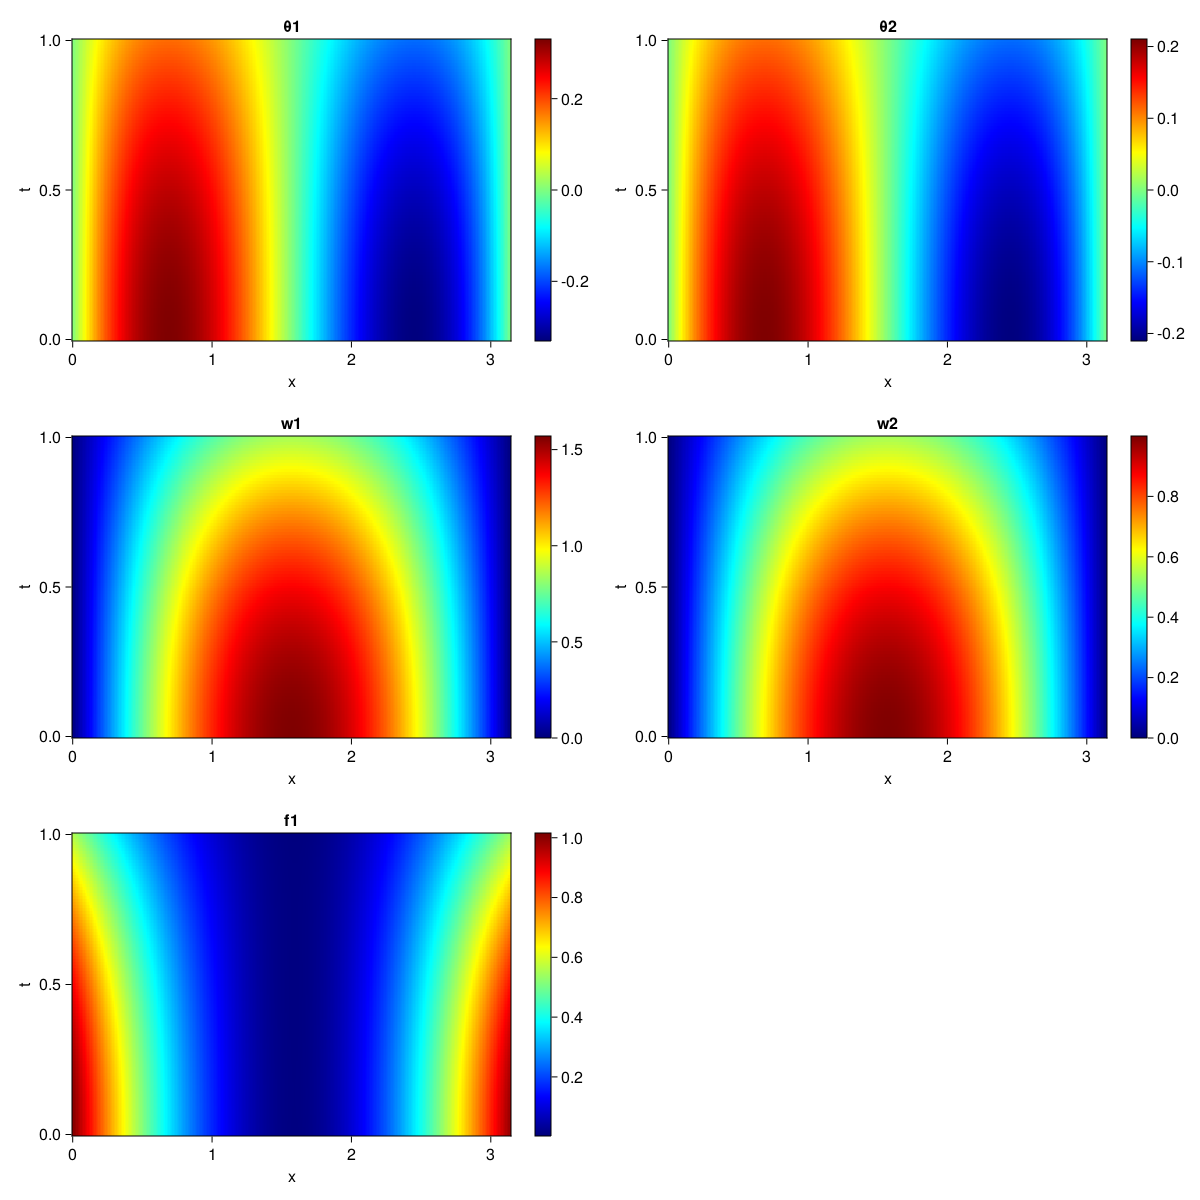

In [12]:
phi = pinn.phi
ps = res.u

xs, ts= [infimum(d.domain):0.01:supremum(d.domain) for d in timo_double.domain]


θ₁ = [sum(phi.θ₁(([x,t]), ps.θ₁)) for x in xs, t in ts]
θ₂ = [sum(phi.θ₂(([x,t]), ps.θ₂)) for x in xs, t in ts]
w₁ = [sum(phi.w₁(([x,t]), ps.w₁)) for x in xs, t in ts]
w₂ = [sum(phi.w₂(([x,t]), ps.w₂)) for x in xs, t in ts]
f₁ = [sum(phi.f₁(([x,t]), ps.f₁)) for x in xs, t in ts]

fig = Figure(resolution=(1200,1200))
axis = (xlabel="x", ylabel="t", title="f1")


_, hm3 = heatmap(fig[1, 1], xs, ts, θ₁, axis= merge(axis, (; title="θ1")), colormap=:jet)
Colorbar(fig[1, 2], hm3)
_, hm4 = heatmap(fig[1, 3], xs, ts, θ₂, axis= merge(axis, (; title="θ2")), colormap=:jet)
Colorbar(fig[1, 4], hm4)
_, hm5 = heatmap(fig[2, 1], xs, ts, w₁, axis= merge(axis, (; title="w1")), colormap=:jet)
Colorbar(fig[2, 2], hm5)
_, hm6 = heatmap(fig[2, 3], xs, ts, w₂, axis= merge(axis, (; title="w2")), colormap=:jet)
Colorbar(fig[2, 4], hm6)
_, hm7 = heatmap(fig[3, 1], xs, ts, f₁, axis= merge(axis, (; title="f1")), colormap=:jet)
Colorbar(fig[3, 2], hm7)

display(fig)

In [13]:
θ₁_analytic(x,t) = (π/2*cos(x) + x - π/2)*cos(t) 
θ₂_analytic(x,t) = (cos(x) + 2/π * x - 1)*cos(t)
w₁_analytic(x,t) = π/2*sin(x)*cos(t)
w₂_analytic(x,t) = sin(x)*cos(t)
f₁_analytic(x,t) = cos(t)*(1-sin(x))

f₁_analytic (generic function with 1 method)

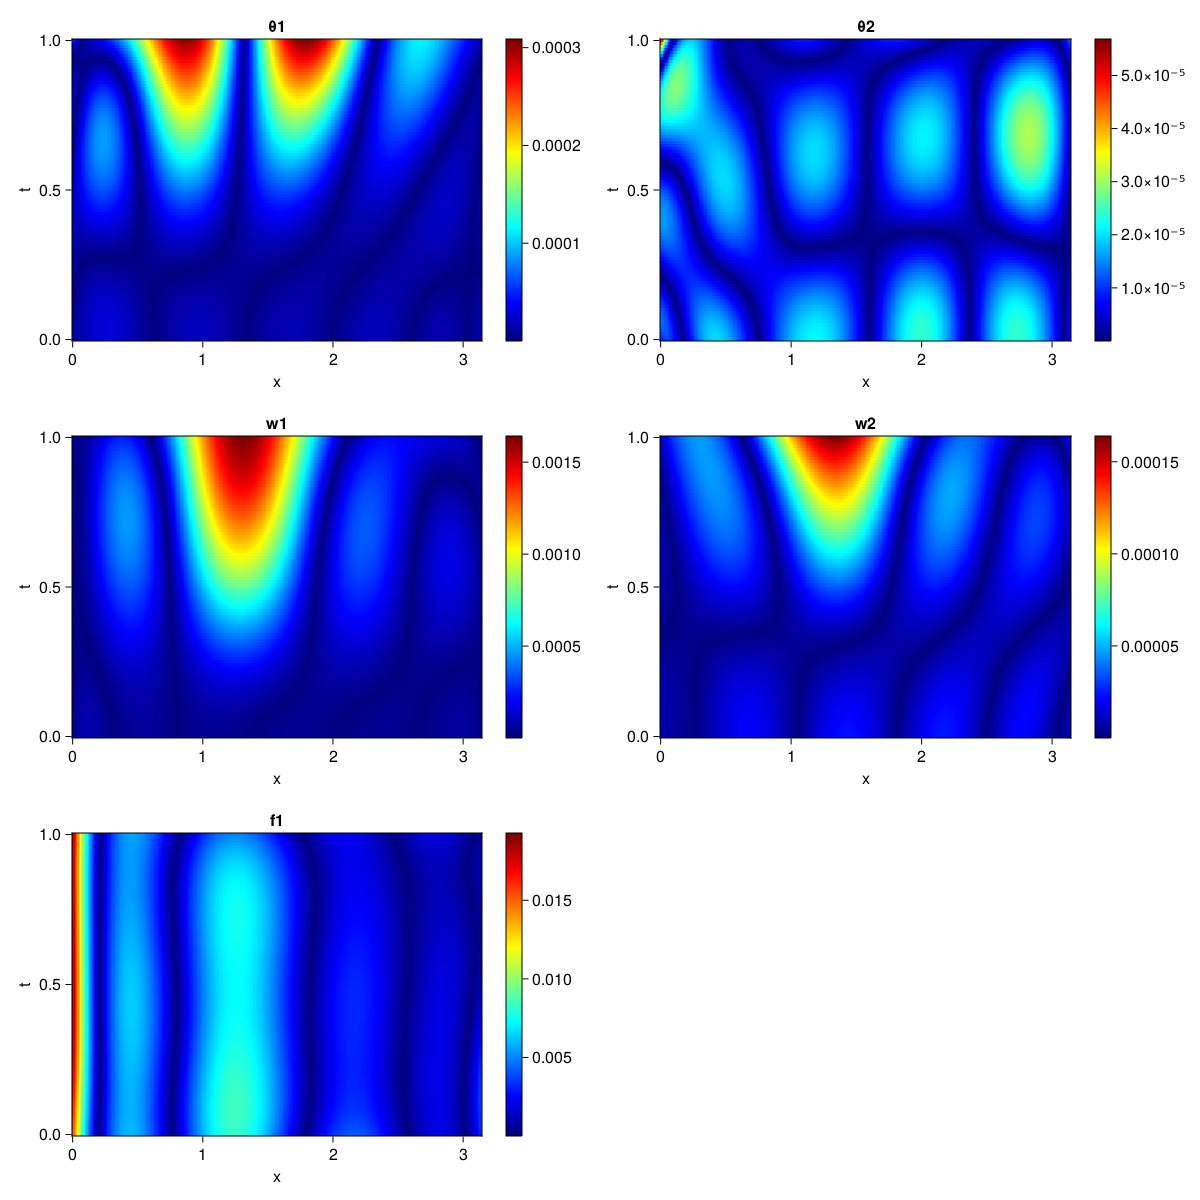

In [15]:
θ₁_true = [θ₁_analytic(x,t) for x in xs, t in ts]
θ₂_true = [θ₂_analytic(x,t) for x in xs, t in ts]
w₁_true = [w₁_analytic(x,t) for x in xs, t in ts]
w₂_true = [w₂_analytic(x,t) for x in xs, t in ts]
f₁_true = [f₁_analytic(x,t) for x in xs, t in ts]

fig = Figure(resolution=(1200,1200))
axis = (xlabel="x", ylabel="t", title="f1 error")


_, hm3 = heatmap(fig[1, 1], xs, ts, abs.(θ₁ .- θ₁_true), axis= merge(axis, (; title="θ1")), colormap=:jet)
Colorbar(fig[1, 2], hm3)
_, hm4 = heatmap(fig[1, 3], xs, ts, abs.(θ₂ .- θ₂_true), axis= merge(axis, (; title="θ2")), colormap=:jet)
Colorbar(fig[1, 4], hm4)

_, hm5 = heatmap(fig[2, 1], xs, ts, abs.(w₁ .- w₁_true), axis= merge(axis, (; title="w1")), colormap=:jet)
Colorbar(fig[2, 2], hm5)
_, hm6 = heatmap(fig[2, 3], xs, ts, abs.(w₂ .- w₂_true), axis= merge(axis, (; title="w2")), colormap=:jet)
Colorbar(fig[2, 4], hm6)

_, hm7 = heatmap(fig[3, 1], xs, ts, abs.(f₁ .- f₁_true), axis= merge(axis, (; title="f1")), colormap=:jet)
Colorbar(fig[3, 2], hm7)

display(fig)